# CAT VS DOG CLASSIFIER CNN MODEL

### Loading Data & Copying images to training, validation, and test directories

In [1]:
import os, shutil
original_dataset_dir = '/Users/NEHA/Downloads/dogs-vs-cats'
base_dir = '/Users/NEHA/Downloads/cats_and_dogs_small'
os.mkdir(base_dir)
train_dir = os.path.join(base_dir, 'train')
os.mkdir(train_dir)
validation_dir = os.path.join(base_dir, 'validation')
os.mkdir(validation_dir)
test_dir = os.path.join(base_dir, 'test')
os.mkdir(test_dir)

In [2]:
train_cats_dir = os.path.join(train_dir, 'cats')
os.mkdir(train_cats_dir)
train_dogs_dir = os.path.join(train_dir, 'dogs')
os.mkdir(train_dogs_dir)

In [3]:
validation_cats_dir = os.path.join(validation_dir, 'cats')
os.mkdir(validation_cats_dir)
validation_dogs_dir = os.path.join(validation_dir, 'dogs')
os.mkdir(validation_dogs_dir)

In [4]:
test_cats_dir = os.path.join(test_dir, 'cats')
os.mkdir(test_cats_dir)
test_dogs_dir = os.path.join(test_dir, 'dogs')
os.mkdir(test_dogs_dir)

In [5]:
fnames = ['cat.{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_cats_dir, fname)
    shutil.copyfile(src, dst)
    
fnames = ['cat.{}.jpg'.format(i) for i in range(1000, 1500)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(validation_cats_dir, fname)
    shutil.copyfile(src, dst)
    
fnames = ['cat.{}.jpg'.format(i) for i in range(1500, 2000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_cats_dir, fname)
    shutil.copyfile(src, dst)

In [6]:
fnames = ['dog.{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_dogs_dir, fname)
    shutil.copyfile(src, dst)

fnames = ['dog.{}.jpg'.format(i) for i in range(1000, 1500)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(validation_dogs_dir, fname)
    shutil.copyfile(src, dst)

fnames = ['dog.{}.jpg'.format(i) for i in range(1500, 2000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_dogs_dir, fname)
    shutil.copyfile(src, dst)

Counting how many pictures are in each training split

In [7]:
print('total training cat images:', len(os.listdir(train_cats_dir)))
print('total training dog images:', len(os.listdir(train_dogs_dir)))
print('total validation cat images:', len(os.listdir(validation_cats_dir)))
print('total validation dog images:', len(os.listdir(validation_dogs_dir)))
print('total test cat images:', len(os.listdir(test_cats_dir)))
print('total test dog images:', len(os.listdir(test_dogs_dir)))

total training cat images: 1000
total training dog images: 1000
total validation cat images: 500
total validation dog images: 500
total test cat images: 500
total test dog images: 500


### Building a small CNNmodel for dogs vs. cats classification

In [8]:
import keras
from keras import layers
from keras import models

In [9]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [10]:
 model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 17, 17, 128)      0

Configuring the model for training

In [11]:
from keras import optimizers
model.compile(loss='binary_crossentropy',optimizer=optimizers.RMSprop(lr=1e-4),metrics=['acc'])

C:\Users\NEHA\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\rmsprop.py:135: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


###  Data preprocessing

Using ImageDataGenerator to read images from directories

In [12]:
from keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)
train_generator = train_datagen.flow_from_directory(train_dir,target_size=(150, 150),batch_size=20,class_mode='binary')
validation_generator = test_datagen.flow_from_directory(validation_dir, target_size=(150, 150), batch_size=20, class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [13]:
for data_batch, labels_batch in train_generator:
    print('data batch shape:', data_batch.shape)
    print('labels batch shape:', labels_batch.shape)
    break

data batch shape: (20, 150, 150, 3)
labels batch shape: (20,)


Fitting the model using a batch generator

In [14]:
history = model.fit_generator(
train_generator,
steps_per_epoch=100,
epochs=30,
validation_data=validation_generator,
validation_steps=50)

C:\Users\NEHA\AppData\Local\Temp/ipykernel_37408/2724264653.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(


Epoch 1/30
100/100 [==============================] - 67s 659ms/step - loss: 0.6916 - acc: 0.5350 - val_loss: 0.6816 - val_acc: 0.5490
Epoch 2/30
100/100 [==============================] - 71s 683ms/step - loss: 0.6622 - acc: 0.6045 - val_loss: 0.6485 - val_acc: 0.6390
Epoch 3/30
100/100 [==============================] - 69s 647ms/step - loss: 0.6227 - acc: 0.6550 - val_loss: 0.6155 - val_acc: 0.6590
Epoch 4/30
100/100 [==============================] - 62s 599ms/step - loss: 0.5806 - acc: 0.6820 - val_loss: 0.6666 - val_acc: 0.5890
Epoch 5/30
100/100 [==============================] - 64s 604ms/step - loss: 0.5386 - acc: 0.7295 - val_loss: 0.5950 - val_acc: 0.6720
Epoch 6/30
100/100 [==============================] - 59s 556ms/step - loss: 0.5136 - acc: 0.7470 - val_loss: 0.5749 - val_acc: 0.6910
Epoch 7/30
100/100 [==============================] - 71s 681ms/step - loss: 0.4885 - acc: 0.7650 - val_loss: 0.5661 - val_acc: 0.6960
Epoch 8/30
100/100 [==============================] - 7

Saving the model

In [15]:
model.save('cats_and_dogs_small_1.h5')

Displaying curves of loss and accuracy during training

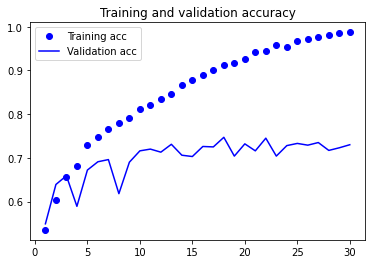

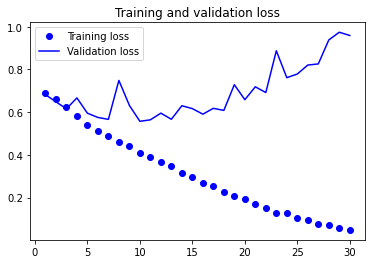

In [16]:
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

These plots are characteristic of overfitting. The training accuracy increases linearly
over time, until it reaches nearly 100%, whereas the validation accuracy stalls at 70–72%.
The validation loss reaches its minimum after only five epochs and then stalls, whereas
the training loss keeps decreasing linearly until it reaches nearly 0

In [22]:
import warnings

#Ignore warnings
warnings.filterwarnings(action='ignore')

In [23]:
train_generator = train_datagen.flow_from_directory(train_dir, target_size=(150, 150), batch_size=20, class_mode='binary')
train_loss, train_acc = model.evaluate_generator(train_generator, steps=50)
print('train acc:', train_acc)
print('train loss:', train_loss)

Found 2000 images belonging to 2 classes.
train acc: 0.9980000257492065
train loss: 0.026658782735466957


In [24]:
test_generator = test_datagen.flow_from_directory(test_dir, target_size=(150, 150), batch_size=20, class_mode='binary')
test_loss, test_acc = model.evaluate_generator(test_generator, steps=50)
print('test acc:', test_acc)
print('test loss:', test_loss)

Found 1000 images belonging to 2 classes.
test acc: 0.734000027179718
test loss: 0.8744814991950989


### Model building with Regularizations

Setting up a data augmentation configuration via ImageDataGenerator

In [25]:
datagen = ImageDataGenerator(
rotation_range=40,
width_shift_range=0.2,
height_shift_range=0.2,
shear_range=0.2,
zoom_range=0.2,
horizontal_flip=True,
fill_mode='nearest')

Displaying some randomly augmented training images

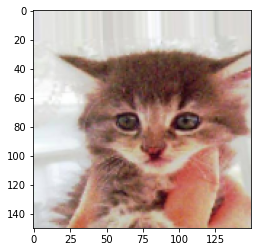

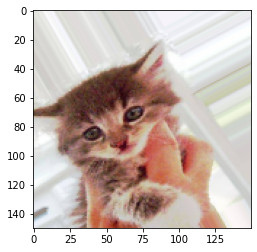

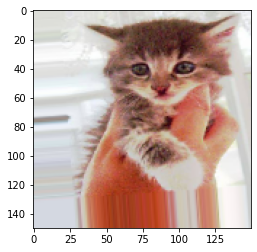

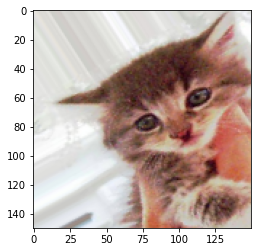

In [26]:
from keras.preprocessing import image
fnames = [os.path.join(train_cats_dir, fname) for fname in os.listdir(train_cats_dir)]
img_path = fnames[3]
img = keras.utils.load_img(img_path, target_size=(150, 150))
x = keras.utils.img_to_array(img)
x = x.reshape((1,) + x.shape)
i = 0
for batch in datagen.flow(x, batch_size=1):
    plt.figure(i)
    imgplot = plt.imshow(keras.utils.array_to_img(batch[0]))
    i += 1
    if i % 4 == 0:
        break
plt.show()

Defining a new convnet that includes dropout

In [30]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer=optimizers.RMSprop(lr=1e-4), metrics=['acc'])

Training the convnet using data augmentation generators

In [31]:
train_datagen = ImageDataGenerator(rescale=1./255, rotation_range=40, width_shift_range=0.2, height_shift_range=0.2,
                                   shear_range=0.2, zoom_range=0.2, horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory( train_dir, target_size=(150, 150), batch_size=32, class_mode='binary')

validation_generator = test_datagen.flow_from_directory(validation_dir, target_size=(150, 150), batch_size=32,
                                                        class_mode='binary')


Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [38]:
batch_size = 32

In [41]:
history = model.fit(train_generator, steps_per_epoch=62, epochs=100, validation_data=validation_generator,
                              validation_steps=31)

Epoch 1/100
62/62 [==============================] - 39s 624ms/step - loss: 0.6723 - acc: 0.5691 - val_loss: 0.6458 - val_acc: 0.6290
Epoch 2/100
62/62 [==============================] - 39s 630ms/step - loss: 0.6553 - acc: 0.6133 - val_loss: 0.6377 - val_acc: 0.6260
Epoch 3/100
62/62 [==============================] - 39s 632ms/step - loss: 0.6424 - acc: 0.6199 - val_loss: 0.6389 - val_acc: 0.5978
Epoch 4/100
62/62 [==============================] - 39s 633ms/step - loss: 0.6333 - acc: 0.6402 - val_loss: 0.6049 - val_acc: 0.6542
Epoch 5/100
62/62 [==============================] - 39s 635ms/step - loss: 0.6138 - acc: 0.6578 - val_loss: 0.5850 - val_acc: 0.6885
Epoch 6/100
62/62 [==============================] - 39s 627ms/step - loss: 0.6142 - acc: 0.6550 - val_loss: 0.6117 - val_acc: 0.6522
Epoch 7/100
62/62 [==============================] - 40s 651ms/step - loss: 0.6000 - acc: 0.6616 - val_loss: 0.6206 - val_acc: 0.6361
Epoch 8/100
62/62 [==============================] - 39s 635ms

Saving the model

In [42]:
model.save('cats_and_dogs_small_2.h5')

Displaying curves of loss and accuracy during training

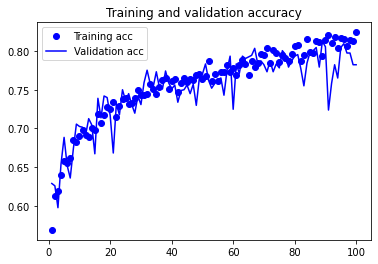

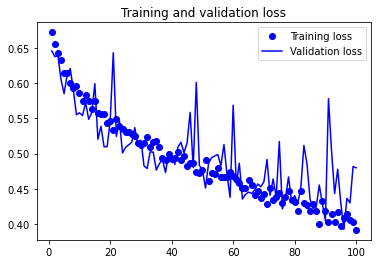

In [43]:
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

As we can see because of data augmentation and dropout, there is no longer overfitting problem the training curves are closely
tracking the validation curves. An accuracy of 82% is reached, a 15% relative improvement over the non-regularized model.

In [44]:
train_generator = train_datagen.flow_from_directory(train_dir, target_size=(150, 150), batch_size=20, class_mode='binary')
train_loss, train_acc = model.evaluate_generator(train_generator, steps=50)
print('train acc:', train_acc)
print('train loss:', train_loss)

Found 2000 images belonging to 2 classes.
train acc: 0.8309999704360962
train loss: 0.37482205033302307


In [45]:
test_generator = test_datagen.flow_from_directory(test_dir, target_size=(150, 150), batch_size=20, class_mode='binary')
test_loss, test_acc = model.evaluate_generator(test_generator, steps=50)
print('test acc:', test_acc)
print('test loss:', test_loss)

Found 1000 images belonging to 2 classes.
test acc: 0.7799999713897705
test loss: 0.4903694987297058


### Using a pretrained convnet

Instantiating the VGG16 convolutional base

In [46]:
from keras.applications import VGG16
conv_base = VGG16(weights='imagenet', include_top=False, input_shape=(150, 150, 3))

In [47]:
conv_base.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 150, 150, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 150, 150, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 150, 150, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 75, 75, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 75, 75, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 75, 75, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 37, 37, 128)       0     

Extracting features using the pretrained convolutional base

In [48]:
import os
import numpy as np
from keras.preprocessing.image import ImageDataGenerator

base_dir = '/Users/NEHA/Downloads/cats_and_dogs_small'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')
test_dir = os.path.join(base_dir, 'test')

datagen = ImageDataGenerator(rescale=1./255)
batch_size = 20

def extract_features(directory, sample_count):
    features = np.zeros(shape=(sample_count, 4, 4, 512))
    labels = np.zeros(shape=(sample_count))
    generator = datagen.flow_from_directory(directory, target_size=(150, 150), batch_size=batch_size, class_mode='binary')
    i = 0
    for inputs_batch, labels_batch in generator:
        features_batch = conv_base.predict(inputs_batch)
        features[i * batch_size : (i + 1) * batch_size] = features_batch
        labels[i * batch_size : (i + 1) * batch_size] = labels_batch
        i += 1
        if i * batch_size >= sample_count:
            break
    return features, labels

train_features, train_labels = extract_features(train_dir, 2000)
validation_features, validation_labels = extract_features(validation_dir, 1000)
test_features, test_labels = extract_features(test_dir, 1000)

Found 2000 images belonging to 2 classes.
1/1 [==============================] - 2s 2s/step
Found 1000 images belonging to 2 classes.
1/1 [==============================] - 1s 1s/step
Found 1000 images belonging to 2 classes.
1/1 [==============================] - 1s 1s/step


In [49]:
train_features = np.reshape(train_features, (2000, 4 * 4 * 512))
validation_features = np.reshape(validation_features, (1000, 4 * 4 * 512))
test_features = np.reshape(test_features, (1000, 4 * 4 * 512))

Defining and training the densely connected classifier

In [50]:
from keras import models
from keras import layers
from keras import optimizers

model = models.Sequential()
model.add(layers.Dense(256, activation='relu', input_dim=4 * 4 * 512))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(optimizer=optimizers.RMSprop(lr=2e-5), loss='binary_crossentropy', metrics=['acc'])

history = model.fit(train_features, train_labels, epochs=30, batch_size=20, 
                    validation_data=(validation_features, validation_labels))

Epoch 1/30
100/100 [==============================] - 3s 29ms/step - loss: 0.5822 - acc: 0.6910 - val_loss: 0.4266 - val_acc: 0.8470
Epoch 2/30
100/100 [==============================] - 3s 28ms/step - loss: 0.4255 - acc: 0.8095 - val_loss: 0.3508 - val_acc: 0.8650
Epoch 3/30
100/100 [==============================] - 3s 27ms/step - loss: 0.3419 - acc: 0.8645 - val_loss: 0.3157 - val_acc: 0.8770
Epoch 4/30
100/100 [==============================] - 3s 28ms/step - loss: 0.3105 - acc: 0.8775 - val_loss: 0.2954 - val_acc: 0.8820
Epoch 5/30
100/100 [==============================] - 3s 29ms/step - loss: 0.2827 - acc: 0.8880 - val_loss: 0.2790 - val_acc: 0.8920
Epoch 6/30
100/100 [==============================] - 3s 28ms/step - loss: 0.2668 - acc: 0.8930 - val_loss: 0.2705 - val_acc: 0.8920
Epoch 7/30
100/100 [==============================] - 3s 30ms/step - loss: 0.2429 - acc: 0.9080 - val_loss: 0.2610 - val_acc: 0.8960
Epoch 8/30
100/100 [==============================] - 3s 28ms/step - 

Plotting the results

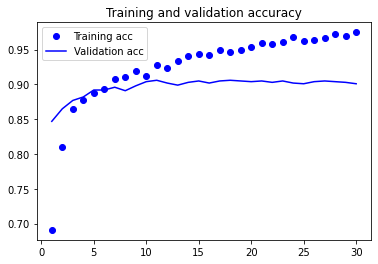

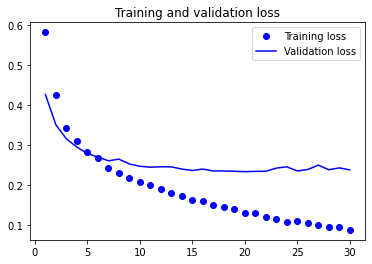

In [60]:
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

Now, Validation accuracy of about 90%

In [61]:
model.save('cats_and_dogs_small_3.h5')

In [ ]:
#class activation map (CAM) visualization


In [4]:
import keras

In [5]:
from keras.applications.vgg16 import VGG16
model = VGG16(weights='imagenet')

In [8]:
from keras.preprocessing import image
from keras.applications.vgg16 import preprocess_input, decode_predictions
import numpy as np

img_path = '/Users/NEHA/Downloads/dogs-vs-cats/cat.29.jpg'

img = keras.utils.load_img(img_path, target_size=(224, 224))

x = keras.utils.img_to_array(img)

x = np.expand_dims(x, axis=0)

x = preprocess_input(x)

In [9]:
preds = model.predict(x)
print('Predicted:', decode_predictions(preds, top=3)[0])

1/1 [==============================] - 4s 4s/step
Predicted: [('n02123597', 'Siamese_cat', 0.5583326), ('n02328150', 'Angora', 0.1994365), ('n02123394', 'Persian_cat', 0.08879167)]
